In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import plotly.plotly as py
import pandas as pd
import plotly
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import matplotlib.pyplot as plt
import pydotplus

/Users/annanau/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



## Load Data

In [2]:
data = pd.read_csv('data/processed/merged_data.csv')

#print(data.shape)
display(data.head())
#data.describe()
#data.isnull().sum()

,Country,Year,Life expectancy at birth (years) Both sexes,Life expectancy at birth (years) Male,Life expectancy at birth (years) Female,Income Level,GDP per Capita,Surface area (sq. km),"Prevalence of HIV, total (% of population ages 15-49)","Population, total",...,"GNI, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI per capita, Atlas method (current US$)",GDP per capita growth (annual %),GDP growth (annual %),Data from database: World Development Indicators,CO2 emissions (metric tons per capita),Access to electricity (% of population),Current health expenditure (CHE) per capita in US$,Research and development expenditure (% of GDP)
0,Afghanistan,2016,62.7,61.0,64.5,L,561.778746,652860.0,NaN,34656032.0,...,1.997900e+10,1970.0,580.0,-0.349412,2.366712,NaN,NaN,84.137138,NaN,NaN
1,Afghanistan,2015,63.2,61.8,64.7,L,569.577923,652860.0,NaN,33736494.0,...,2.025955e+10,1940.0,600.0,-1.628298,1.310040,NaN,NaN,71.500000,60.1,NaN
2,Afghanistan,2014,63.0,61.7,64.4,L,629.345250,652860.0,NaN,32758020.0,...,2.133585e+10,1950.0,650.0,-0.526845,2.690522,NaN,0.299445,89.500000,60.1,NaN
3,Afghanistan,2013,62.7,61.5,64.1,L,638.612543,652860.0,NaN,31731688.0,...,2.148262e+10,1940.0,680.0,0.512509,3.900575,NaN,0.315602,67.259552,56.0,NaN
4,Afghanistan,2012,62.2,60.9,63.6,L,669.009051,652860.0,NaN,30696958.0,...,2.069665e+10,1900.0,670.0,10.750252,14.434741,NaN,0.350371,69.100000,52.2,NaN


## Scatter Plot Matrix

/Users/annanau/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



ValueError: zero-size array to reduction operation minimum which has no identity

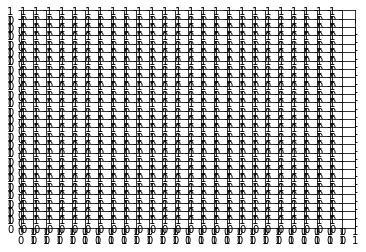

In [10]:
fig = plt.figure()
ax = fig.subplots()
sm = pd.plotting.scatter_matrix(data, ax = ax)

## Correlation Matrix

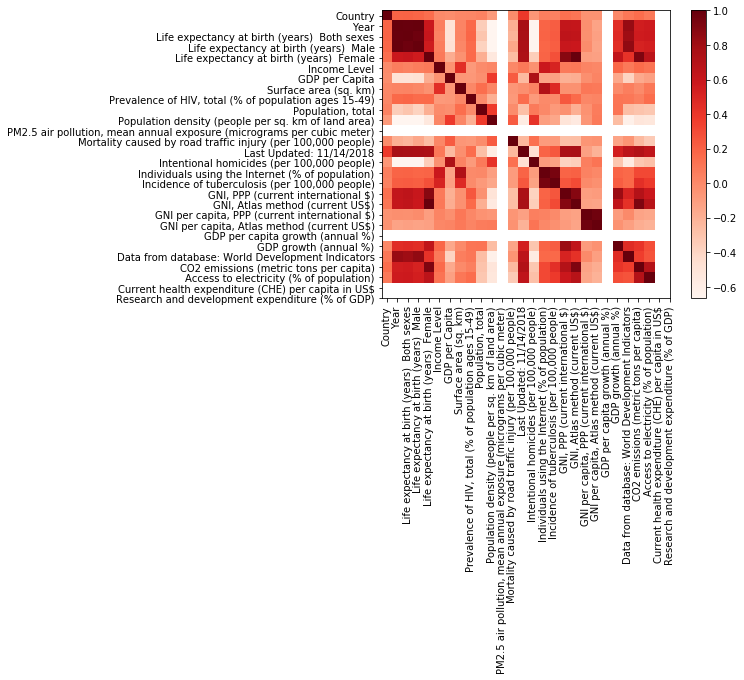

In [4]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.imshow(data.corr(), cmap = plt.cm.Reds, interpolation = 'nearest')
plt.colorbar()
ticks = [i for i in range(len(data.columns))]
plt.xticks(ticks, data.columns, rotation = 'vertical')
plt.yticks(ticks, data.columns)
plt.show()

## Male vs. Female Life Expectancy at Birth by Country (2014-2016)

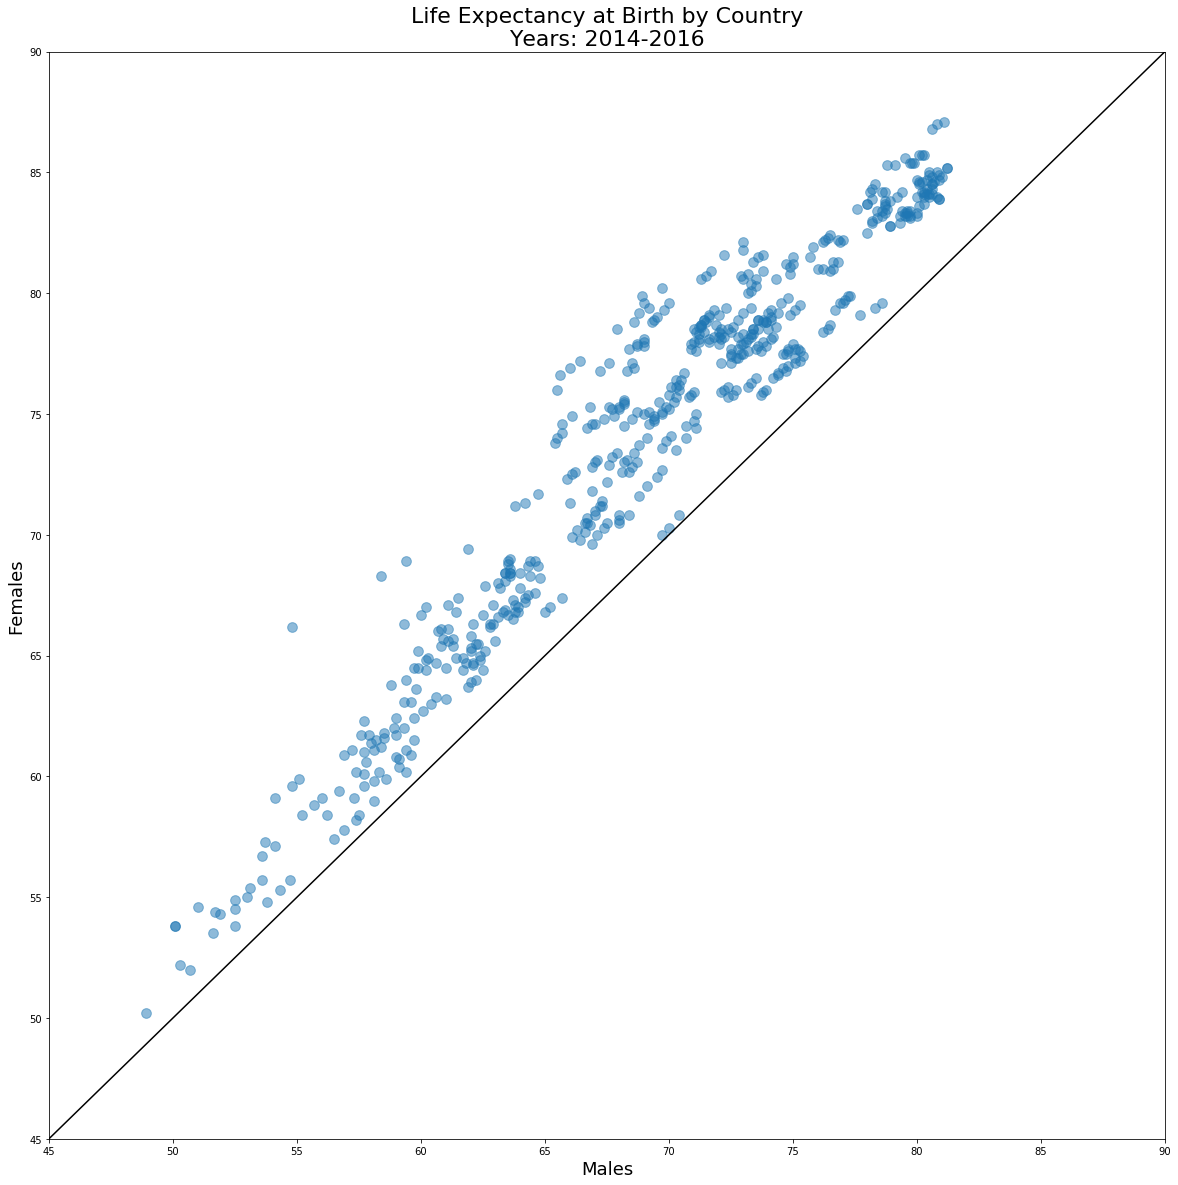

In [5]:
years = [2014, 2015, 2016]
area = np.pi*30
x = [45, 90]
y = [45, 90]

fig = plt.figure(figsize=(20,20))
plt.scatter(data[data.Year.isin(years)].iloc[:,3], data[data.Year.isin(years)].iloc[:,4], s=area,  alpha=0.5)
plt.axis([45, 90, 45, 90])
plt.title('Life Expectancy at Birth by Country\nYears: 2014-2016', fontsize=22)
plt.xlabel('Males', fontsize=18)
plt.ylabel('Females', fontsize=18)
plt.plot(x,y, color='black')
plt.show() 

## Choropleth Map: Average World Life Expectancy at Birth for Both Sexes (2016)

In [6]:
# load data with country codes
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
country_code = pd.read_csv(url)
country_code = country_code.iloc[:, [0,2]]
country_code.rename(index=str, columns={"alpha-3": "code"}, inplace=True)

# Replace country names of country_code dataframe to avoid missing values when merging
country_code['name'].replace(to_replace="Korea (Democratic People's Republic of)", value="Democratic People's Republic of Korea", inplace=True)
country_code['name'].replace(to_replace="Congo (Democratic Republic of the)", value="Democratic Republic of the Congo", inplace=True)
country_code['name'].replace(to_replace="Korea (Republic of)", value="Republic of Korea", inplace=True)
country_code['name'].replace(to_replace="Moldova (Republic of)", value="Republic of Moldova", inplace=True)
country_code['name'].replace(to_replace="Macedonia (the former Yugoslav Republic of)", value="The former Yugoslav republic of Macedonia", inplace=True)
country_code['name'].replace(to_replace="Tanzania, United Republic of", value="United Republic of Tanzania", inplace=True)
country_code['name'].replace(to_replace="Viet Nam", value="Vietnam", inplace=True)

In [7]:
# Merge data and country_code dataframes
data2 = pd.merge(data, country_code, how='outer', left_on='Country', 
                 right_on='name')
data2.drop('name', axis=1,  inplace=True)
data2_16 = data2[data2['Year'] == 2016] # 2016 obs. only

In [8]:
#data2_16[data2_16['code'].isna()]
#data2_16['code'].isnull().sum()
#data.loc[data['Country'] == 'United States of America'].head()
#code.loc[code['Country Name'] == 'Bolivia']

In [9]:
df = data2_16.groupby(['Country', 'code'], as_index=False)['Life expectancy at birth (years)  Both sexes'].mean()

plotly_data = [ dict(
        type = 'choropleth',
        locations = df['code'],
        z = df['Life expectancy at birth (years)  Both sexes'],
        text = df['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            #tickprefix = '$',
            title = 'Years'),
      ) ]

layout = dict(
    title = 'Average World Life Expectancy at Birth for Both Sexes (2016)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict(data=plotly_data, layout=layout)
py.iplot(fig, validate=False, filename='world-map2016')

## Life expectancy at Birth vs. GDP per capita

In [36]:
#print(data)
#data.isnull().sum()
data.head()

,Country,Year,Life expectancy at birth (years) Both sexes,Life expectancy at birth (years) Male,Life expectancy at birth (years) Female,Income Level,GDP per Capita,Current health expenditure (CHE) per capita in US$,Research and development expenditure (% of GDP)
0,Afghanistan,2016,62.7,61.0,64.5,L,561.778746,NaN,NaN
1,Afghanistan,2015,63.2,61.8,64.7,L,569.577923,60.1,NaN
2,Afghanistan,2014,63.0,61.7,64.4,L,629.345250,60.1,NaN
3,Afghanistan,2013,62.7,61.5,64.1,L,638.612543,56.0,NaN
4,Afghanistan,2012,62.2,60.9,63.6,L,669.009051,52.2,NaN


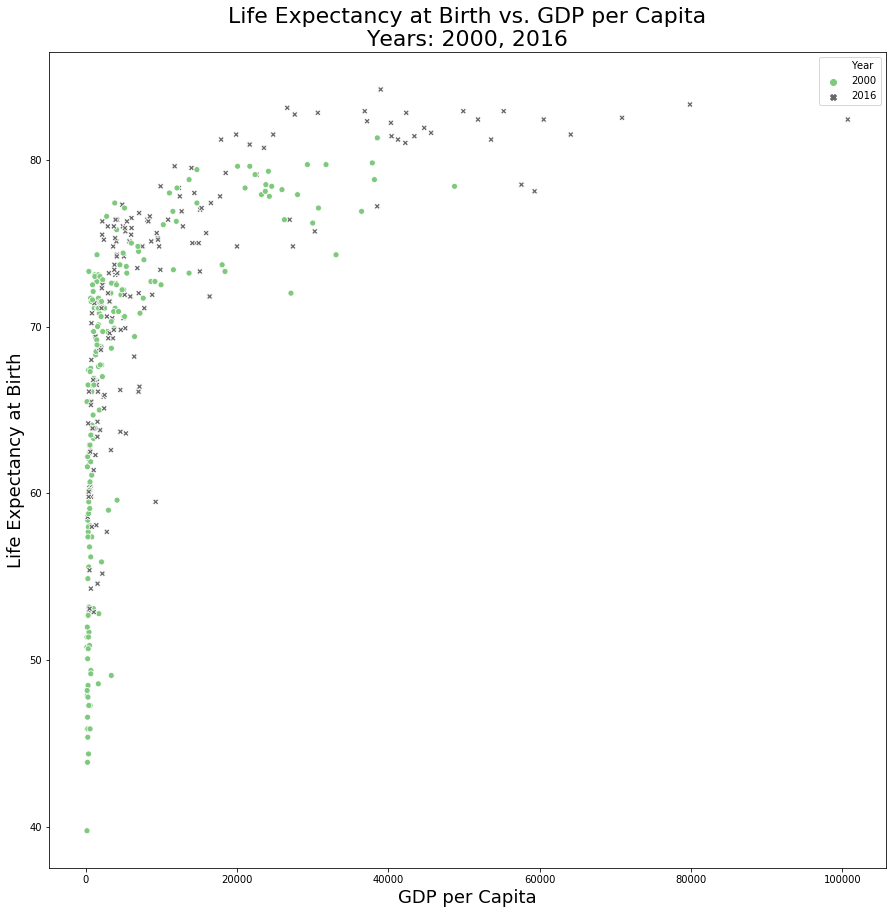

In [10]:
years = [2000, 2016]
#colors = ['red','blue']
data_00_16 = data[data.Year.isin(years)]

fig = plt.figure(figsize=(15,15))
#plt.scatter(data[data.Year.isin(years)].iloc[:,6], data[data.Year.isin(years)].iloc[:,2], c=data[data.Year.isin(years)].iloc[:,1],
           #cmap='bwr', label=data[data.Year.isin(years)].iloc[:,1], alpha=0.5)
#plt.scatter(data[data.Year.isin(years)].iloc[:,6], data[data.Year.isin(years)].iloc[:,2], c='bwr',
            #label=data[data.Year.isin(years)].iloc[:,1], alpha=0.5)
#plt.scatter(data[data.Year.isin(years)].iloc[:,6], data[data.Year.isin(years)].iloc[:,2], c=data[data.Year.isin(years)].iloc[:,1],
           #cmap='bwr', label=years, alpha=0.5)
# Add a column: the color depends of x and y values, but you can use whatever function.
sns.set_palette("Paired")
sns.scatterplot(x=data_00_16.iloc[:, 6], y=data_00_16.iloc[:, 2], hue=data_00_16['Year'], style=data_00_16['Year'],
               data=data_00_16, legend='full', palette='Accent')
plt.title('Life Expectancy at Birth vs. GDP per Capita\nYears: 2000, 2016', fontsize=22)
plt.xlabel('GDP per Capita', fontsize=18)
plt.ylabel('Life Expectancy at Birth', fontsize=18)

plt.show() 

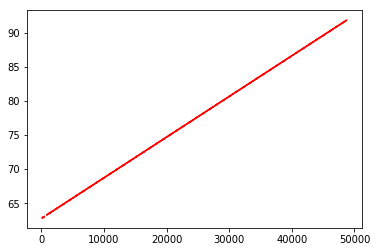

In [38]:
# random code
# add trend lines for year 2000
x_2000 = data[data.Year == 2000].iloc[:,6]
y_2000 = data[data.Year == 2000].iloc[:,2]
idx = np.isfinite(x_2000) & np.isfinite(y_2000)
z = np.polyfit(x=x_2000[idx], y=y_2000[idx], deg=1)
p = np.poly1d(z)
plt.plot(x_2000[idx],p(x_2000[idx]),"r--")

x_2000 = data[data.Year == 2000].iloc[:,6]
y_2000 = data[data.Year == 2000].iloc[:,2]
idx = np.isfinite(x_2000) & np.isfinite(y_2000)
ab = np.polyfit(np.log(x_2000[idx]), y_2000[idx], 1)
f = np.poly1d(z)
plt.plot(x_2000[idx],f(x_2000[idx]),"r--")

## What characteristics of countries are predictors for differences in life expectancies?

In [8]:
# load cleaned data 
data_cleaned = pd.read_csv('data/processed/data_flat_clean.csv')
X = data_cleaned.iloc[:,5:]
y = data_cleaned.iloc[:,2]

# Encode categorical feature, 'Income Level' as a one-hot numeric array
one_hot = pd.get_dummies(X['Income Level'])
# Drop column B as it is now encoded
X.drop('Income Level',axis = 1, inplace=True)
# Join the encoded df
X = X.join(one_hot)

X.head()

,GDP per Capita,Surface area (sq. km),"Population, total",Population density (people per sq. km of land area),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Mortality caused by road traffic injury (per 100,000 people)","Intentional homicides (per 100,000 people)",Individuals using the Internet (% of population),"Incidence of tuberculosis (per 100,000 people)","GNI per capita, Atlas method (current US$)",GDP per capita growth (annual %),GDP growth (annual %),CO2 emissions (metric tons per capita),Access to electricity (% of population),CHE_in_USD,H,L,LM,UM
0,561.778746,652860.0,34656032.0,53.083405,62.854857,15.2,6.345906,10.595726,189.0,580.0,-0.349412,2.366712,0.299445,84.137138,60.1,0,1,0,0
1,4131.872341,28750.0,2876101.0,104.967190,14.634008,13.6,2.698926,66.363445,16.0,4320.0,3.517531,3.352159,1.978763,100.000000,265.9,0,0,0,1
2,3916.881571,2381740.0,40606052.0,17.048895,37.230956,23.7,1.359366,42.945527,70.0,4360.0,1.431403,3.300000,3.717410,99.439568,291.6,0,0,0,1
3,3308.772828,1246700.0,28813463.0,23.111786,36.240479,24.4,4.849349,13.000000,370.0,3450.0,-4.098056,-0.813494,1.291328,40.520607,108.6,0,0,1,0
4,14462.176279,440.0,100963.0,229.461364,15.685943,11.5,10.333034,73.000000,3.4,13560.0,4.257367,5.342479,5.377649,97.354668,657.2,1,0,0,0


#### Feature Selection using selectFromModel() from sklearn 
- I specify the random forest instance, indicating the number of trees
- Then I use selectFromModel object from sklearn to automatically select the features
- To see which features are important I use get_support() method on the fitted model. Will return an array of boolean values. True for the features whose importance is greater than the mean importance and False for the rest.

In [9]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X, y)
sel.get_support()

# list with selected features
selected_feat = X.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

2
Index(['Access to electricity (% of population)', 'CHE_in_USD'], dtype='object')


#### Feature Selection using Decision Tree Model

In [10]:
reg = DecisionTreeRegressor(max_depth=5, random_state = 123).fit(X,y)

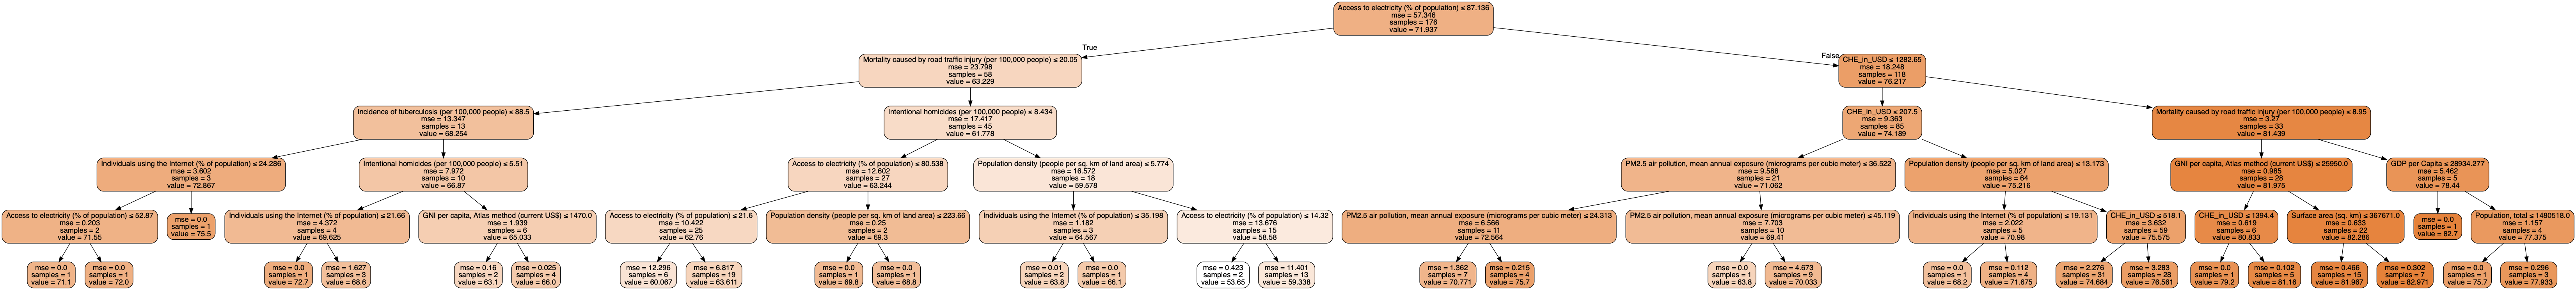

In [11]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
# Get numerical feature importances
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Access to electricity (% of population) Importance: 0.71
Variable: CHE_in_USD           Importance: 0.17
Variable: Mortality caused by road traffic injury (per 100,000 people) Importance: 0.05
Variable: Population density (people per sq. km of land area) Importance: 0.02
Variable: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) Importance: 0.02
Variable: Intentional homicides (per 100,000 people) Importance: 0.02
Variable: Incidence of tuberculosis (per 100,000 people) Importance: 0.01
Variable: GDP per Capita       Importance: 0.0
Variable: Surface area (sq. km) Importance: 0.0
Variable: Population, total    Importance: 0.0
Variable: Individuals using the Internet (% of population) Importance: 0.0
Variable: GNI per capita, Atlas method (current US$) Importance: 0.0
Variable: GDP per capita growth (annual %) Importance: 0.0
Variable: GDP growth (annual %) Importance: 0.0
Variable: CO2 emissions (metric tons per capita) Importance: 0.0
Variable: H       